# 신경망 모델에서 옵티마이저 사용법
### - 이진분류: 유방암 예측 사례

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify = cancer.target,
    test_size = 0.2, random_state = 2022
)

### 1. Adam optimizer

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
model = Sequential([
    Dense(100, input_dim = 30, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

#### Adam 하이퍼 파라메터
- learning_rate: 0보다 크거나 같은 float 값. 학습률.
- beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
- amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다

In [6]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999,
            epsilon = None, decay = 0.0, amsgrad = False)

In [7]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, y_train, validation_split = 0.2,
                 epochs=100, batch_size = 100, verbose=0)

In [13]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1460 - accuracy: 0.9649


[0.14603246748447418, 0.9649122953414917]

In [16]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

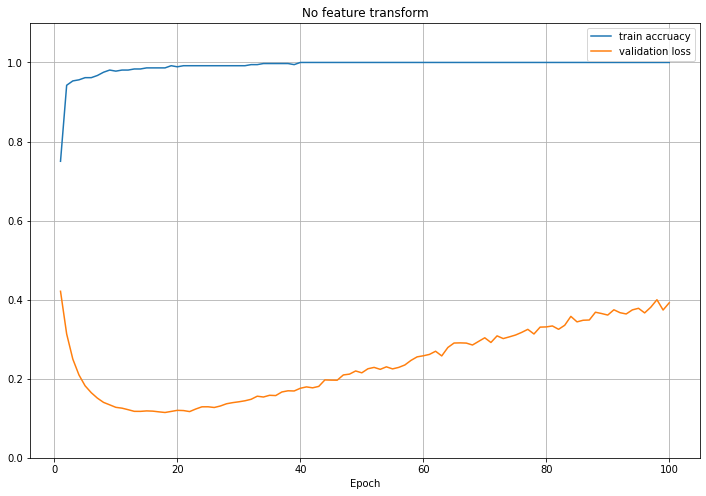

In [26]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, label = 'train accruacy')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

#### 2. RMSprop Sequential

In [18]:
model2 = Sequential([
    Dense(100, input_dim = 30, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

#### RMSprop 하이퍼 파라메터
- lr: 0보다 크거나 같은 float 값. 학습률.
- rho: 0보다 크거나 같은 float 값.
- epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
- decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.


In [19]:
from tensorflow.keras.optimizers import RMSprop
rmsp = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon=None, decay=0.0)

In [20]:
model2.compile(rmsp, 'binary_crossentropy', ['accuracy'])

In [21]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=100, batch_size=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 0.5781 - accuracy: 0.7500 - val_loss: 0.4212 - val_accuracy: 0.8901 - 1s/epoch - 315ms/step
Epoch 2/100
4/4 - 0s - loss: 0.3568 - accuracy: 0.9423 - val_loss: 0.3133 - val_accuracy: 0.9231 - 51ms/epoch - 13ms/step
Epoch 3/100
4/4 - 0s - loss: 0.2632 - accuracy: 0.9533 - val_loss: 0.2497 - val_accuracy: 0.9231 - 54ms/epoch - 14ms/step
Epoch 4/100
4/4 - 0s - loss: 0.2090 - accuracy: 0.9560 - val_loss: 0.2096 - val_accuracy: 0.9231 - 42ms/epoch - 10ms/step
Epoch 5/100
4/4 - 0s - loss: 0.1736 - accuracy: 0.9615 - val_loss: 0.1821 - val_accuracy: 0.9231 - 45ms/epoch - 11ms/step
Epoch 6/100
4/4 - 0s - loss: 0.1501 - accuracy: 0.9615 - val_loss: 0.1647 - val_accuracy: 0.9341 - 42ms/epoch - 11ms/step
Epoch 7/100
4/4 - 0s - loss: 0.1320 - accuracy: 0.9670 - val_loss: 0.1509 - val_accuracy: 0.9341 - 51ms/epoch - 13ms/step
Epoch 8/100
4/4 - 0s - loss: 0.1181 - accuracy: 0.9753 - val_loss: 0.1402 - val_accuracy: 0.9670 - 71ms/epoch - 18ms/step
Epoch 9/100
4/4 - 0s - lo

In [22]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1392 - accuracy: 0.9737


[0.13919073343276978, 0.9736841917037964]

In [24]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs = np.arange(1, len(y_acc2)+1)

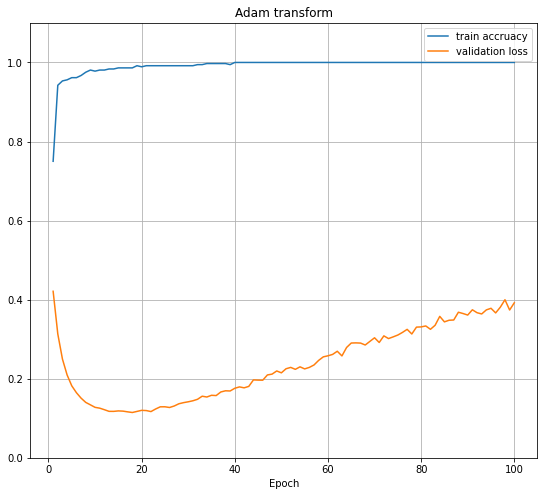

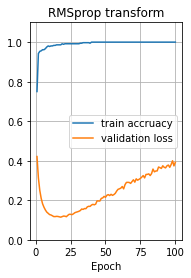

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs, y_acc, label = 'train accruacy')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.1])
plt.xlabel('Epoch')
plt.title('Adam Optimizer')
plt.show()
plt.subplot(122)
plt.plot(xs, y_acc2, label = 'train accruacy')
plt.plot(xs, y_vloss2, label = 'validation loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.1])
plt.xlabel('Epoch')
plt.title('RMSprop Optimizer')
plt.show()